<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/eval_assn1_22_23_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
from submit import my_fit
import time as tm
from sklearn.metrics import mean_absolute_error as mae

In [18]:
X_trn = np.loadtxt( "train_challenges.dat" )
y_trn = np.loadtxt( "train_responses.dat" )
X_tst = np.loadtxt( "dummy_test_challenges.dat" )
y_tst = np.loadtxt( "dummy_test_responses.dat" )
w_gold = np.loadtxt( "dummy_w.dat" )

In [19]:
# Hard Thresholding operation
# Given a vector and a sparsity level, sparsify the vector
# by setting small magnitude coordinates to 0
def HT( v, k ):
    t = np.zeros_like( v )
    if k < 1:
        return t
    else:
        ind = np.argsort( abs( v ) )[ -k: ]
        t[ ind ] = v[ ind ]
        return t

In [20]:
def HT( v, k ):
    t = np.zeros_like( v )
    if k < 1:
        return t
    else:
        ind = np.argsort( abs( v ) )[ -k: ]
        t[ ind ] = v[ ind ]
        return t

In [21]:
def supp_int( x, y, k ):
    x_t = HT( x, k )
    y_t = HT( y, k )
    supp_x = np.where( x_t != 0, 1, 0 )
    supp_y = np.where( y_t != 0, 1, 0 )
    return np.dot( supp_x, supp_y ) / k

In [22]:
n_trials = 5

t_train = 0
model_err = 0
mae_err = 0
supp_rec = 0

S = 512

In [23]:
for t in range( n_trials ):
  tic = tm.perf_counter()
  w_hat = HT( my_fit( X_trn, y_trn ), S )
  toc = tm.perf_counter()
  t_train += toc - tic
  model_err += np.linalg.norm( w_hat - w_gold )
  mae_err += mae( y_tst, X_tst @ w_hat )
  supp_rec += supp_int( w_hat, w_gold, S )

In [24]:
t_train /= n_trials
model_err /= n_trials
mae_err /= n_trials
supp_rec /= n_trials

print( t_train, model_err, mae_err, supp_rec )

10.252246311400006 238.29521479212707 1.945045103184384e-07 0.240234375


In [25]:
from sklearn.metrics import r2_score
r2_score(y_tst, X_tst @ w_hat)

1.0

In [26]:
print(y_tst)

[2084.124563 2012.504414 1990.788626 2071.257805 2050.180405 1895.330337
 1931.15173  2187.987286 1725.600319 1951.105838 2073.217607 2101.303856
 1744.478343 1984.075217 1970.733345 1891.657927 2054.295837 2087.34002
 2091.836159 2114.897405 1847.983179 2015.629939 2050.783637 2039.723435
 1692.609836 2123.997636 1902.926895 2101.295601 1942.911406 2316.202315
 1986.755061 2155.315775 2111.6911   2064.038697 2202.239259 2056.986546
 1997.915547 2336.759641 2078.174465 2041.38439  2031.201494 1819.834278
 2038.890496 1958.970409 2128.087397 2110.355633 2082.411012 1889.09428
 2065.827768 2043.407268 2145.744548 2198.489342 1970.830775 2078.866898
 2026.037377 1925.41556  1951.949719 2118.12645  1836.878496 2103.813785
 2203.651919 2059.208598 1908.801913 2019.256616 1816.442611 1867.162827
 2015.620017 2003.696647 2035.781332 1874.637433 1954.302407 1910.697274
 2036.696764 1851.324526 1925.490785 2236.046357 2220.624122 1997.767914
 1927.483195 2020.148269 1967.123313 2094.373977 1950

In [27]:
print(X_tst @ w_hat)

[2084.12456337 2012.50441434 1990.78862576 2071.25780507 2050.18040503
 1895.33033703 1931.15173012 2187.98728605 1725.60031935 1951.10583801
 2073.21760706 2101.30385598 1744.47834265 1984.07521704 1970.73334525
 1891.65792714 2054.29583723 2087.34001961 2091.83615885 2114.89740516
 1847.98317915 2015.62993857 2050.78363741 2039.72343514 1692.6098358
 2123.99763618 1902.92689501 2101.29560064 1942.91140646 2316.20231512
 1986.75506066 2155.31577507 2111.69109979 2064.03869699 2202.23925873
 2056.98654625 1997.91554668 2336.75964088 2078.1744645  2041.38438978
 2031.2014937  1819.8342779  2038.89049591 1958.97040921 2128.0873968
 2110.35563306 2082.41101192 1889.09428034 2065.82776809 2043.4072678
 2145.7445481  2198.48934159 1970.83077528 2078.86689783 2026.03737686
 1925.41556013 1951.94971911 2118.12644991 1836.87849602 2103.81378468
 2203.65191887 2059.20859783 1908.80191314 2019.25661608 1816.44261146
 1867.16282652 2015.62001711 2003.6966474  2035.78133163 1874.63743256
 1954.302

<Axes: >

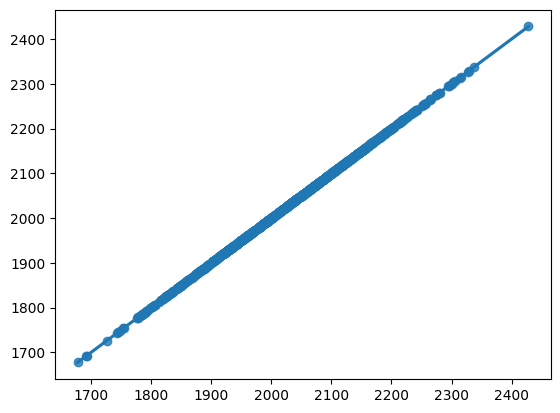

In [31]:
import seaborn as sns
sns.regplot(x = y_tst, y = X_tst @ w_hat)
plt.xlabel()